# Name:Abdellrahman Amgad
## Group: 1

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import r2_score
import math
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
a=-1
b=2
x=np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot your data points. 

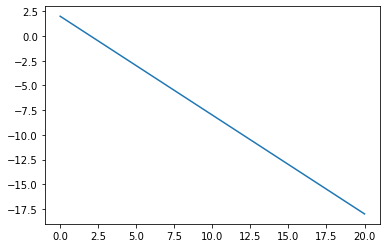

In [32]:
plt.plot(x,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

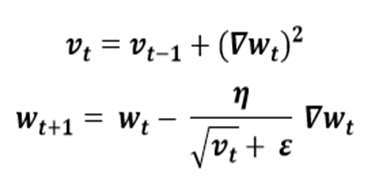

In [33]:
def adagrad(x,y,learing_rate,eps,max_iter):
    m=len(x)
    theta_0=0
    theta_1=0
    cost=0
    v_old_0,v_new_0,v_old_1,v_new_1=0,0,0,0
    all_theta_0,all_theta_1,costs=[],[],[]
    all_h=[]
    for i in range(max_iter):
        hypothesis=theta_0+theta_1*x
        all_h.append(hypothesis)
        cost=(1/(2*m))*((np.linalg.norm(hypothesis-y))**2)
        gradients=[(1/m)*np.sum(hypothesis-y),(1/m)*np.sum(x.dot(hypothesis-y))]
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break 
        v_new_0=v_old_0+(gradients[0]**2)
        v_new_1=v_old_1+(gradients[1]**2)
        theta_0=theta_0-(learing_rate/(math.sqrt(v_new_0)+eps))*gradients[0]
        theta_1=theta_1-(learing_rate/(math.sqrt(v_new_1)+eps))*gradients[1]
        v_old_0=v_new_1
        v_old_1=v_new_1
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)
    all_h.append(all_theta_0[-1]+all_theta_1[-1]*x)
    return all_theta_0,all_theta_1,costs,all_h,all_theta_0[-1],all_theta_1[-1],i+1
thetas_0,thetas_1,costs,all_h,last_theta0,last_theta1,iterr=adagrad(x,y,0.01,1e-8,1000)

In [34]:
y_pred=last_theta0+last_theta1*x
y_pred

array([ -0.04482337,  -0.25694057,  -0.46905777,  -0.68117497,
        -0.89329218,  -1.10540938,  -1.31752658,  -1.52964378,
        -1.74176098,  -1.95387818,  -2.16599539,  -2.37811259,
        -2.59022979,  -2.80234699,  -3.01446419,  -3.22658139,
        -3.43869859,  -3.6508158 ,  -3.862933  ,  -4.0750502 ,
        -4.2871674 ,  -4.4992846 ,  -4.7114018 ,  -4.923519  ,
        -5.13563621,  -5.34775341,  -5.55987061,  -5.77198781,
        -5.98410501,  -6.19622221,  -6.40833941,  -6.62045662,
        -6.83257382,  -7.04469102,  -7.25680822,  -7.46892542,
        -7.68104262,  -7.89315983,  -8.10527703,  -8.31739423,
        -8.52951143,  -8.74162863,  -8.95374583,  -9.16586303,
        -9.37798024,  -9.59009744,  -9.80221464, -10.01433184,
       -10.22644904, -10.43856624])

In [36]:
r2=r2_score(y,y_pred)
print(r2)
print('in percentage',r2*100,'%')

0.5500030132567462
in percentage 55.00030132567461 %


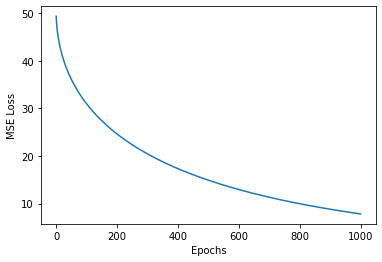

In [40]:
plt.plot(costs) 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

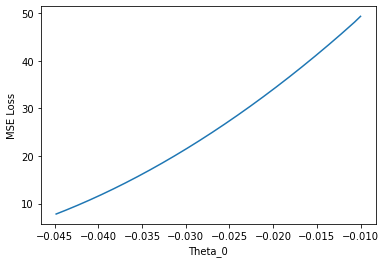

In [41]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

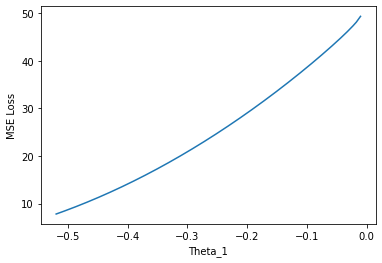

In [42]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

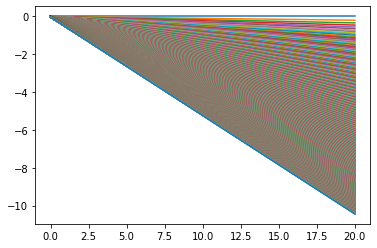

In [43]:
for i in range(len(all_h)):
    plt.plot(x,all_h[i])
plt.show()

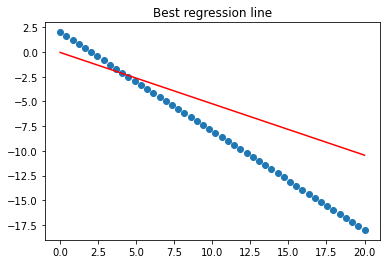

In [48]:
plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.title('Best regression line')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

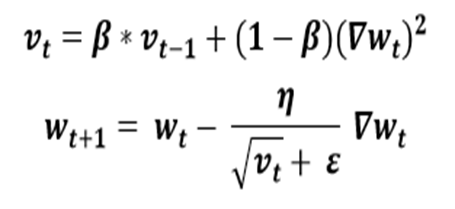

In [6]:
def RMS(x,y,learing_rate,beta,eps,max_iter):
    m = len(x)
    theta_0=0
    theta_1=0 
    cost=0
    v_old_0,v_new_0,v_old_1,v_new_1=0,0,0,0
    all_theta_0,all_theta_1,costs,all_h=[],[],[],[]
    for i in range(max_iter):
        hypothesis=theta_0+theta_1*x
        all_h.append(hypothesis)
        cost=(1/(2*len(x)))*((np.linalg.norm(hypothesis-y))** 2)
        gradients=[(1/len(x))*np.sum(hypothesis-y),(1/len(x))*np.sum(x.dot(hypothesis-y))]
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break  
        v_new_0=beta*v_old_0+(1-beta)*(gradients[0]**2)
        v_new_1=beta*v_old_1+(1-beta)*(gradients[1]**2)
        theta_0=theta_0-(learing_rate/(math.sqrt(v_new_0)+eps))*gradients[0]
        theta_1=theta_1-(learing_rate/(math.sqrt(v_new_1)+eps))*gradients[1]
        v_old_0=v_new_1
        v_old_1=v_new_1
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)
    all_h.append(all_theta_0[-1] + all_theta_1[-1] * x)
    
    return all_theta_0,all_theta_1,costs,all_h,all_theta_0[-1],all_theta_1[-1],i+1
thetas_0,thetas_1,costs,all_h,last_theta0,last_theta1,actual_iter = RMS(x,y,0.5,0.5,1e-8,1000)

In [7]:
y_pred=last_theta0+last_theta1*x
y_pred

array([  1.95909073,   1.44933274,   0.93957475,   0.42981676,
        -0.07994123,  -0.58969922,  -1.09945721,  -1.60921519,
        -2.11897318,  -2.62873117,  -3.13848916,  -3.64824715,
        -4.15800514,  -4.66776312,  -5.17752111,  -5.6872791 ,
        -6.19703709,  -6.70679508,  -7.21655307,  -7.72631106,
        -8.23606904,  -8.74582703,  -9.25558502,  -9.76534301,
       -10.275101  , -10.78485899, -11.29461697, -11.80437496,
       -12.31413295, -12.82389094, -13.33364893, -13.84340692,
       -14.35316491, -14.86292289, -15.37268088, -15.88243887,
       -16.39219686, -16.90195485, -17.41171284, -17.92147082,
       -18.43122881, -18.9409868 , -19.45074479, -19.96050278,
       -20.47026077, -20.98001876, -21.48977674, -21.99953473,
       -22.50929272, -23.01905071])

In [9]:
r2=r2_score(y,y_pred)
print(r2)
print('in percentage',r2*100,'%')

0.7535516583023012
in percentage 75.35516583023012 %


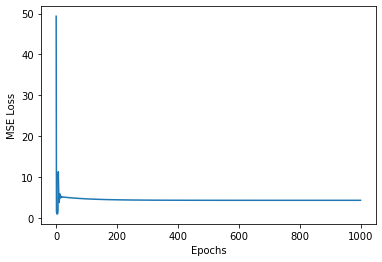

In [11]:
plt.plot(costs) 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

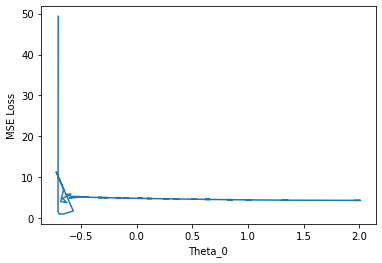

In [12]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

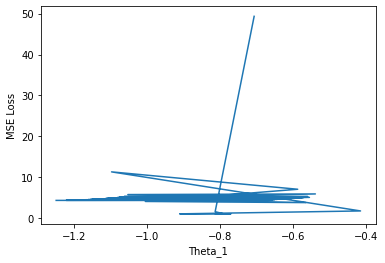

In [13]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

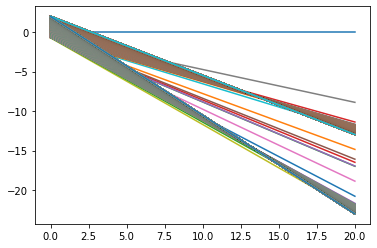

In [14]:
for i in range(len(all_h)):
    plt.plot(x,all_h[i])
plt.show()

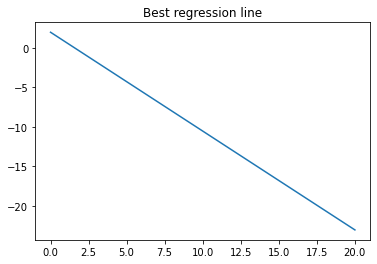

In [15]:
plt.plot(x,all_h[-1])
plt.title('Best regression line')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

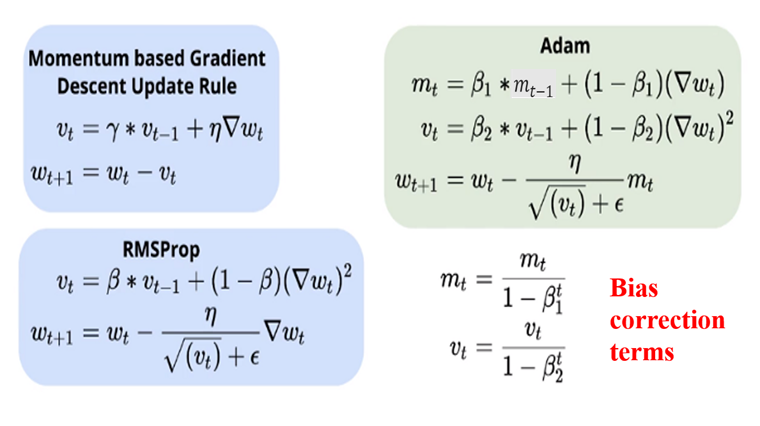

In [7]:
def adam(x,y,learing_rate,beta_1,beta_2,eps,max_iter):
    theta_0=0
    theta_1=0
    cost=0
    v_old_0,v_new_0,v_old_1,v_new_1=0,0,0,0
    m_old_0,m_new_0,m_old_1,m_new_1=0,0,0,0
    all_theta_0,all_theta_1,costs=[],[],[]
    all_h=[]
    for i in range(1,max_iter+1):
        hypothesis=theta_0+theta_1*x
        all_h.append(hypothesis) 
        cost=(1/(2*len(x)))*((np.linalg.norm(hypothesis-y))**2)
        gradients=[(1/len(x))*np.sum(hypothesis-y),(1/len(x))*np.sum(x.dot(hypothesis-y))]
        if ((abs(gradients[0]) < 0.01) and (abs(gradients[1]) < 0.01)): 
            break 
        m_new_0=beta_1*m_old_0+(1-beta_1)*gradients[0]
        m_new_1=beta_1*m_old_1+(1-beta_1)*gradients[1] 
        v_new_0=beta_2*v_old_0+(1-beta_2)*(gradients[0]**2)
        v_new_1=beta_2*v_old_1+(1-beta_2)*(gradients[1]**2)   
        m_correction_0=m_new_0/(1-(beta_1**i))
        m_correction_1=m_new_1/(1-(beta_1**i))
        v_correction_0=v_new_0/(1-(beta_2**i))
        v_correction_1=v_new_1/(1-(beta_2**i))
        theta_0=theta_0-(learing_rate/(math.sqrt(v_correction_0)+ eps))*m_correction_0
        theta_1=theta_1-(learing_rate/(math.sqrt(v_correction_1)+ eps))*m_correction_1
        v_old_0=v_new_1
        v_old_1=v_new_1
        m_old_0=m_new_1
        m_old_1=m_new_1
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)
    all_h.append(all_theta_0[-1]+all_theta_1[-1]*x)
    return all_theta_0,all_theta_1,costs,all_h,all_theta_0[-1],all_theta_1[-1]
thetas_0,thetas_1,costs,all_h,last_theta0,last_theta1=adam(x,y,0.01,0.99,0.99,1e-8,1000)

In [8]:
y_pred=last_theta0+last_theta1*x
y_pred

array([ -0.76897203,  -1.09147136,  -1.41397069,  -1.73647002,
        -2.05896935,  -2.38146868,  -2.70396801,  -3.02646734,
        -3.34896666,  -3.67146599,  -3.99396532,  -4.31646465,
        -4.63896398,  -4.96146331,  -5.28396264,  -5.60646196,
        -5.92896129,  -6.25146062,  -6.57395995,  -6.89645928,
        -7.21895861,  -7.54145794,  -7.86395726,  -8.18645659,
        -8.50895592,  -8.83145525,  -9.15395458,  -9.47645391,
        -9.79895324, -10.12145257, -10.44395189, -10.76645122,
       -11.08895055, -11.41144988, -11.73394921, -12.05644854,
       -12.37894787, -12.70144719, -13.02394652, -13.34644585,
       -13.66894518, -13.99144451, -14.31394384, -14.63644317,
       -14.95894249, -15.28144182, -15.60394115, -15.92644048,
       -16.24893981, -16.57143914])

In [10]:
r2=r2_score(y,y_pred)
print(r2)
print('in percentage',r2*100,'%')

0.9430049699080105
in percentage 94.30049699080105 %


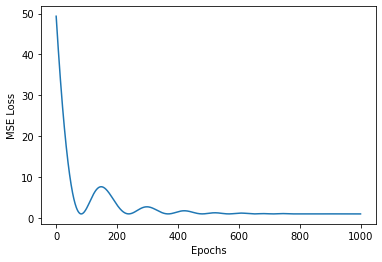

In [11]:
plt.plot(costs) 
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

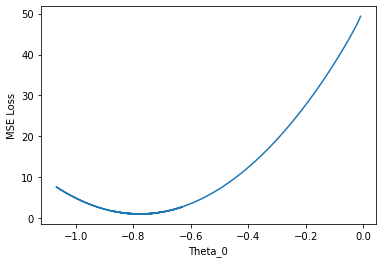

In [12]:
plt.plot(thetas_0,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

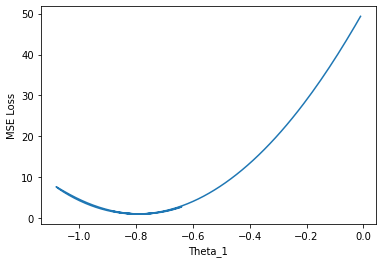

In [13]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

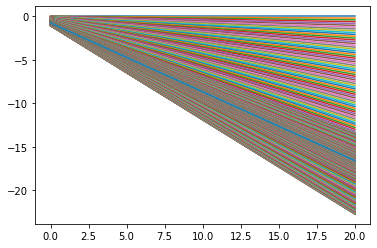

In [14]:
for i in range(len(all_h)):
    plt.plot(x,all_h[i])
plt.show()

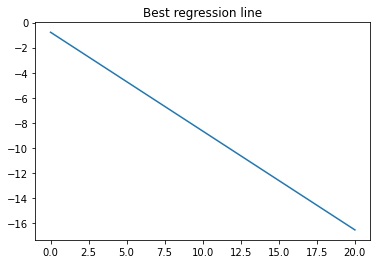

In [16]:
plt.plot(x,all_h[-1])
plt.title('Best regression line')
plt.show()

## Congratulations 
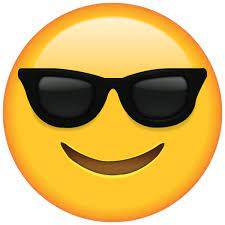